In [4]:
import numpy as np
import random
from tensorflow import keras
from tensorflowjs import converters

import matplotlib.pyplot as plt 
import pandas as pd

In [5]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time)

22:45:10


In [6]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = df_train.label.to_numpy()
x_train = df_train.drop('label',axis=1).to_numpy()
print(x_train.shape,y_train.shape)

(60000, 784) (60000,)


In [9]:
x_test = df_test.drop('label',axis=1).to_numpy()
print(x_test.shape)

(10000, 784)


In [10]:
x_train = x_train.reshape(x_train.shape[0],28,28)
x_test = x_test.reshape(x_test.shape[0],28,28)
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [12]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [13]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
print(y_train.shape)

(60000, 10)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [16]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [18]:
batch_size = 200  
epochs = 40

cnn_model =  model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_split=0.2
                      )

Epoch 1/40
240/240 [==============================] - 112s 467ms/step - loss: 0.2305 - accuracy: 0.9277 - val_loss: 0.0576 - val_accuracy: 0.9832
Epoch 2/40
240/240 [==============================] - 112s 466ms/step - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.0561 - val_accuracy: 0.9829
Epoch 3/40
240/240 [==============================] - 112s 466ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0448 - val_accuracy: 0.9869
Epoch 4/40
240/240 [==============================] - 110s 457ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0451 - val_accuracy: 0.9868
Epoch 5/40
240/240 [==============================] - 111s 463ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0460 - val_accuracy: 0.9872
Epoch 6/40
240/240 [==============================] - 114s 474ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0516 - val_accuracy: 0.9865
Epoch 7/40
240/240 [==============================] - 110s 459ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0456 -

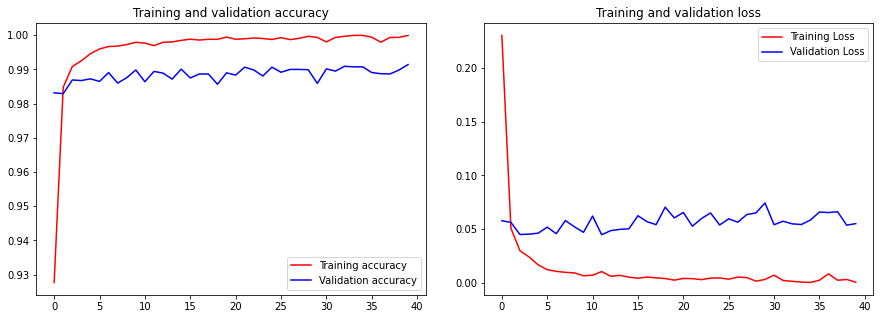

In [19]:
train_acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']  
train_loss = cnn_model.history['loss'] 
val_loss = cnn_model.history['val_loss'] 

epochs = range(epochs)

# subplots 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.025)
ax = ax.ravel() ## plot arrary 



ax[0].plot(epochs, cnn_model.history['accuracy'], 'r', label='Training accuracy')
ax[0].plot(epochs, cnn_model.history['val_accuracy'] , 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()


ax[1].plot(epochs, cnn_model.history['loss'] , 'r', label='Training Loss')
ax[1].plot(epochs, cnn_model.history['val_loss'] , 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

In [20]:
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test.shape

(10000, 28, 28, 1)

In [21]:
y_pred = np.argmax(model.predict(x_test), axis=1)

2

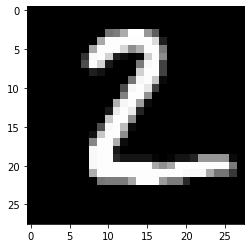

In [22]:
plt.imshow(x_test[1].reshape(28,28), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
y_pred[1]

In [23]:
submissions = pd.DataFrame()
submissions["ImageId"] = [i for i in range(1, y_pred.shape[0]+1)]
submissions["Label"] = y_pred

submissions.to_csv("submissions.csv", index=False)

In [24]:
model.save('saved_model.keras')

In [25]:
model = keras.models.load_model('saved_model.keras')

In [26]:
model_json = model.to_json()

In [27]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [28]:
model.save_weights("model.h5")

In [31]:
converters.save_keras_model(model, '.')

c:\users\peter\appdata\local\programs\python\python38\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
